In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Question 1: Number of missing values


In [3]:
# check for missing dataset
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Question 2: Median for population


In [5]:
data['population'].median()

1166.0

In [6]:
# cjeck the len of our dataset
n = len(data)
# print(n)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [7]:
# split the dataset
df_train = data.iloc[:n_train]
df_val = data.iloc[n_train:n_train+n_val]
df_test = data.iloc[n_train+n_val:]

In [8]:
df_train.shape, df_val.shape, df_test.shape

((12384, 10), (4128, 10), (4128, 10))

In [9]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [10]:
# to get shuffled random observation
np.random.seed(2)
np.random.shuffle(idx)
idx.shape

(20640,)

In [11]:
df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train + n_val:]]

In [12]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [13]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [14]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.65,33.60,15.0,5736.0,NaN,2529.0,762.0,6.4114,278700.0,<1H OCEAN
1,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,207600.0,INLAND
2,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,96700.0,<1H OCEAN
3,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,353800.0,NEAR OCEAN
4,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,390500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
12379,-117.83,33.74,23.0,1818.0,522.0,958.0,485.0,2.6771,131500.0,<1H OCEAN
12380,-117.25,32.80,32.0,1601.0,468.0,731.0,429.0,2.5568,258300.0,NEAR OCEAN
12381,-122.40,37.60,52.0,1380.0,203.0,530.0,210.0,6.2210,420300.0,NEAR OCEAN
12382,-122.47,37.75,52.0,1598.0,285.0,689.0,265.0,4.6071,337400.0,NEAR BAY


In [15]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [16]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [17]:
df_train.iloc[10]

longitude               -117.99
latitude                  33.66
housing_median_age         14.0
total_rooms              3155.0
total_bedrooms            653.0
population                951.0
households                575.0
median_income            3.0625
ocean_proximity       <1H OCEAN
Name: 10, dtype: object

In [18]:
xi = [3155.0, 653.0, 951.0]
w0 = 1.40 #bias term
w = [0.1, 0.003, 0.001] #weight

In [19]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [20]:
linear_regression(xi)

319.81

In [21]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    
    
    for j in range(n):
        res = res + xi[j] + w[j]
    return res

In [22]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [23]:
w_new = [w0] + w

In [24]:
linear_regression(xi)

4761.504000000001

In [25]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [26]:
def linear_regression(X):
    return X.dot(w_new)

In [27]:
linear_regression(X)

array([17.657, 16.706, 46.819])

In [37]:
X = [[148, 24, 1385], 
     [132, 25, 2031], 
     [453, 11, 86],
     [158, 24, 185], 
     [172, 25, 201], 
     [413, 11, 86],
     [38, 54, 185], 
     [142, 25, 431], 
     [453, 31, 86]
    ]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [29]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
X = np.column_stack([ones, X])

In [31]:
y = [100, 200, 150, 250, 100, 200, 150, 250,120]

In [32]:
XTX = X.T.dot(X)

In [33]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [34]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [35]:
df_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object

In [38]:
train_linear_regression(X, y)

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

In [39]:
base = ['longitude','latitude','housing_median_age', 'total_rooms','total_bedrooms','population', 'households','median_income']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [40]:
## Using mean as fillna

def prepare_X_M(df):
    df_num = df[base]
    df_num = df_num.fillna(df.mean())
    X = df_num.values
    return X

In [41]:
X_train = prepare_X(df_train)

In [42]:
# for mean
X_train = prepare_X_M(df_train)

In [43]:
X_train

array([[-1.1765e+02,  3.3600e+01,  1.5000e+01, ...,  2.5290e+03,
         7.6200e+02,  6.4114e+00],
       [-1.2091e+02,  3.8620e+01,  1.2000e+01, ...,  2.0330e+03,
         7.1800e+02,  4.1843e+00],
       [-1.1823e+02,  3.3930e+01,  3.5000e+01, ...,  9.0900e+02,
         2.1400e+02,  1.7411e+00],
       ...,
       [-1.2240e+02,  3.7600e+01,  5.2000e+01, ...,  5.3000e+02,
         2.1000e+02,  6.2210e+00],
       [-1.2247e+02,  3.7750e+01,  5.2000e+01, ...,  6.8900e+02,
         2.6500e+02,  4.6071e+00],
       [-1.2225e+02,  3.7490e+01,  4.0000e+01, ...,  1.1560e+03,
         5.1000e+02,  4.6366e+00]])

In [44]:
y_train

array([12.5378948 , 12.24337325, 11.47937902, ..., 12.9487264 ,
       12.72902741, 12.88790859])

In [45]:
# X_train = prepare_X(df_train)
# w0, w = train_linear_regression(X_train, y_train)

# # We are trying to prepare our data like we did with df_train
# X_val = prepare_X(df_val)
# y_pred = w0 + X_val.dot(w)

# rmse(y_val, y_pred)

In [46]:
w0, w = train_linear_regression(X_train, y_train) 
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

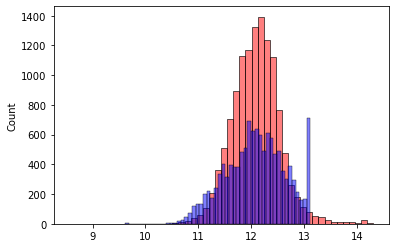

In [47]:
sns.histplot(y_pred, color = "red", alpha = 0.5,bins=50)
sns.histplot(y_train, color = "blue", alpha = 0.5,bins=50)

In [48]:
def rmse(actual, pred):
    se = (actual - pred) ** 2
    rms = np.mean(se)
    return np.sqrt(rms)

### Question 3: Best way to fill NAs


In [49]:
Z = rmse(y_train, y_pred) #for zero

In [50]:
round(Z, 2)

0.34

In [51]:
M = rmse(y_train, y_pred) #for mean

In [52]:
round(M,2)

0.34

In [53]:
def train_linear_regression_reg(X,y,r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTC = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

## Question 4: Best regularization parameter r


In [54]:
r_reg = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]


for r in r_reg:
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)



    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
#     print(f'for r = {r}, the score is = {round(score, 2)}')
    print(f'for r = {r}, the score is = {score}')

for r = 0, the score is = 0.33209123188418505
for r = 1e-06, the score is = 0.33209123188418505
for r = 0.0001, the score is = 0.33209123188418505
for r = 0.001, the score is = 0.33209123188418505
for r = 0.01, the score is = 0.33209123188418505
for r = 0.1, the score is = 0.33209123188418505
for r = 1, the score is = 0.33209123188418505
for r = 5, the score is = 0.33209123188418505
for r = 10, the score is = 0.33209123188418505


The Regularization score are the same

In [58]:
r_reg = 10
# for r in r_reg:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=r)



X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.33209123188418505

## Question 5: STD of RMSE scores for different seeds
